# **Library**

In [52]:
!pip install -q scikit-fuzzy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from matplotlib import colors
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
import skfuzzy as fuzz
import numpy as np
import skfuzzy as cmeans
import sklearn.cluster as cmeans

# **Import Data**

In [53]:
data = pd.read_csv('products_all_brands.csv')
data

,brand_name,product_name,product_id,beauty_point_earned,price_range,price_by_combinations,url,active_date,default_category,categories,rating_types_str,average_rating,total_reviews,average_rating_by_types,total_recommended_count,total_repurchase_maybe_count,total_repurchase_no_count,total_repurchase_yes_count,total_in_wishlist
0,796_3ce,MULTI EYE COLOR PALETTE,97802,130,Rp 555.000 - Rp 687.000,NaN,https://www.sociolla.com/eyeshadow/69460-phan-...,2022-10-03T03:30:06.681Z,Eyeshadow,Makeup; Eyes; Eyeshadow,is_star_long_wear;is_star_packaging;is_star_pi...,4.920000,5,"""star_long_wear"": 5; ""star_packaging"": 4.8; ""s...",5,0,0,5,717
1,796_3ce,VELVET LIP TINT,97810,50,Rp 264.000,NaN,https://www.sociolla.com/lip-cream/69468-son-k...,2022-10-03T03:02:40.340Z,Lip Cream,Makeup; Lips; Lip Cream,is_star_long_wear;is_star_packaging;is_star_pi...,4.576190,42,"""star_long_wear"": 4.309523809523809; ""star_pac...",42,10,2,30,682
2,796_3ce,LIP COLOR,97822,60,Rp 317.000,NaN,https://www.sociolla.com/lip-matte/69480-son-t...,2023-05-30T09:49:15.158Z,Lipstick,Makeup; Lips; Lipstick,is_star_long_wear;is_star_packaging;is_star_pi...,0.000000,0,NaN,0,0,0,0,173
3,796_3ce,MINI MULTI EYE COLOR PALETTE,97833,80,Rp 423.000,NaN,https://www.sociolla.com/eyeshadow/69491-phan-...,2022-10-03T03:27:01.334Z,Eyeshadow,Makeup; Eyes; Eyeshadow,is_star_long_wear;is_star_packaging;is_star_pi...,4.883333,6,"""star_long_wear"": 4.916666666666667; ""star_pac...",12,1,0,11,257
4,796_3ce,FACE BLUSH,97801,60,Rp 300.000,NaN,https://www.sociolla.com/blush/69459-phan-ma-h...,2022-10-03T03:22:26.610Z,Blush,Makeup; Face; Blush,is_star_long_wear;is_star_packaging;is_star_pi...,4.858824,13,"""star_long_wear"": 4.9411764705882355; ""star_pa...",17,2,0,15,387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7631,273_yves-rocher,Ambre Noir Eau De Toilette,2158,130,Rp 659.000,NaN,https://sociolla.com/fragrance/8088-ambre-noir...,NaN,Eau De Toilette,Shop By Departments; Home; UOBMon,is_star_long_wear;is_star_packaging;is_star_va...,4.476190,7,"""star_long_wear"": 4.285714285714286; ""star_pac...",6,1,2,4,355
7632,273_yves-rocher,Soin Stimulating Conditioner,64174,30,Rp 199.000,NaN,https://vn.sociolla.com/d-u-x/17239-soin-stimu...,NaN,Conditioner,Hair Care; Shampoo; Conditioner,is_star_effectiveness;is_star_packaging;is_sta...,4.638889,9,"""star_effectiveness"": 4.444444444444445; ""star...",7,1,2,6,122
7633,273_yves-rocher,Repair Hair Mask,36357,50,Rp 289.000,NaN,https://www.sociolla.com/hair-mask/14833-repai...,2022-10-27T07:33:19.380Z,Hair Mask,Hair Care; Hair Treatment; Hair Mask,is_star_effectiveness;is_star_packaging;is_sta...,4.750000,5,"""star_effectiveness"": 5; ""star_packaging"": 5; ...",5,1,0,4,58
7634,273_yves-rocher,Hand Cream Olive Petitgrain,36404,20,Rp 109.000,NaN,https://www.sociolla.com/221-hand-and-foot-cre...,NaN,Hand & Foot Cream,Shop By Departments; Home; 12.12 PRICE POINT 50%,is_star_effectiveness;is_star_packaging;is_sta...,4.968750,8,"""star_effectiveness"": 5; ""star_packaging"": 5; ...",8,2,0,6,117


**Check Str Data**

In [54]:
data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7636 entries, 0 to 7635
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   brand_name                    7636 non-null   object 
 1   product_name                  7636 non-null   object 
 2   product_id                    7636 non-null   int64  
 3   beauty_point_earned           7636 non-null   int64  
 4   price_range                   7636 non-null   object 
 5   price_by_combinations         4087 non-null   object 
 6   url                           7636 non-null   object 
 7   active_date                   5534 non-null   object 
 8   default_category              7636 non-null   object 
 9   categories                    7632 non-null   object 
 10  rating_types_str              7561 non-null   object 
 11  average_rating                7636 non-null   float64
 12  total_reviews                 7636 non-null   int64  
 13  ave

,0
brand_name,0
product_name,0
product_id,0
beauty_point_earned,0
price_range,0
price_by_combinations,3549
url,0
active_date,2102
default_category,0
categories,4


In [55]:
#Check baris yg ada duplikat
data.duplicated().sum()

0

# **Cleaning Data**

In [56]:
datasociolla = data.copy()

#Split kolom brand id
datasociolla[['brand_id', 'brand_name']] = datasociolla['brand_name'].str.split('_', n=1, expand=True)
datasociolla[['price_range', 'price_range(2)']] = datasociolla['price_range'].str.split('-', n=1, expand=True)
datasociolla.head()

,brand_name,product_name,product_id,beauty_point_earned,price_range,price_by_combinations,url,active_date,default_category,categories,...,average_rating,total_reviews,average_rating_by_types,total_recommended_count,total_repurchase_maybe_count,total_repurchase_no_count,total_repurchase_yes_count,total_in_wishlist,brand_id,price_range(2)
0,3ce,MULTI EYE COLOR PALETTE,97802,130,Rp 555.000,NaN,https://www.sociolla.com/eyeshadow/69460-phan-...,2022-10-03T03:30:06.681Z,Eyeshadow,Makeup; Eyes; Eyeshadow,...,4.920000,5,"""star_long_wear"": 5; ""star_packaging"": 4.8; ""s...",5,0,0,5,717,796,Rp 687.000
1,3ce,VELVET LIP TINT,97810,50,Rp 264.000,NaN,https://www.sociolla.com/lip-cream/69468-son-k...,2022-10-03T03:02:40.340Z,Lip Cream,Makeup; Lips; Lip Cream,...,4.576190,42,"""star_long_wear"": 4.309523809523809; ""star_pac...",42,10,2,30,682,796,None
2,3ce,LIP COLOR,97822,60,Rp 317.000,NaN,https://www.sociolla.com/lip-matte/69480-son-t...,2023-05-30T09:49:15.158Z,Lipstick,Makeup; Lips; Lipstick,...,0.000000,0,NaN,0,0,0,0,173,796,None
3,3ce,MINI MULTI EYE COLOR PALETTE,97833,80,Rp 423.000,NaN,https://www.sociolla.com/eyeshadow/69491-phan-...,2022-10-03T03:27:01.334Z,Eyeshadow,Makeup; Eyes; Eyeshadow,...,4.883333,6,"""star_long_wear"": 4.916666666666667; ""star_pac...",12,1,0,11,257,796,None
4,3ce,FACE BLUSH,97801,60,Rp 300.000,NaN,https://www.sociolla.com/blush/69459-phan-ma-h...,2022-10-03T03:22:26.610Z,Blush,Makeup; Face; Blush,...,4.858824,13,"""star_long_wear"": 4.9411764705882355; ""star_pa...",17,2,0,15,387,796,None


In [57]:
# Menghilangkan "Rp", spasi, dan titik, dan convert kolom menjadi numerik
datasociolla['price_range'] = pd.to_numeric(datasociolla['price_range'].str.replace('Rp', '', regex=False).str.replace('[^\d]', '', regex=True))
datasociolla['price_range(2)'] = pd.to_numeric(datasociolla['price_range(2)'].str.replace('Rp', '', regex=False).str.replace('[^\d]', '', regex=True))
datasociolla.head()

,brand_name,product_name,product_id,beauty_point_earned,price_range,price_by_combinations,url,active_date,default_category,categories,...,average_rating,total_reviews,average_rating_by_types,total_recommended_count,total_repurchase_maybe_count,total_repurchase_no_count,total_repurchase_yes_count,total_in_wishlist,brand_id,price_range(2)
0,3ce,MULTI EYE COLOR PALETTE,97802,130,555000,NaN,https://www.sociolla.com/eyeshadow/69460-phan-...,2022-10-03T03:30:06.681Z,Eyeshadow,Makeup; Eyes; Eyeshadow,...,4.920000,5,"""star_long_wear"": 5; ""star_packaging"": 4.8; ""s...",5,0,0,5,717,796,687000.0
1,3ce,VELVET LIP TINT,97810,50,264000,NaN,https://www.sociolla.com/lip-cream/69468-son-k...,2022-10-03T03:02:40.340Z,Lip Cream,Makeup; Lips; Lip Cream,...,4.576190,42,"""star_long_wear"": 4.309523809523809; ""star_pac...",42,10,2,30,682,796,NaN
2,3ce,LIP COLOR,97822,60,317000,NaN,https://www.sociolla.com/lip-matte/69480-son-t...,2023-05-30T09:49:15.158Z,Lipstick,Makeup; Lips; Lipstick,...,0.000000,0,NaN,0,0,0,0,173,796,NaN
3,3ce,MINI MULTI EYE COLOR PALETTE,97833,80,423000,NaN,https://www.sociolla.com/eyeshadow/69491-phan-...,2022-10-03T03:27:01.334Z,Eyeshadow,Makeup; Eyes; Eyeshadow,...,4.883333,6,"""star_long_wear"": 4.916666666666667; ""star_pac...",12,1,0,11,257,796,NaN
4,3ce,FACE BLUSH,97801,60,300000,NaN,https://www.sociolla.com/blush/69459-phan-ma-h...,2022-10-03T03:22:26.610Z,Blush,Makeup; Face; Blush,...,4.858824,13,"""star_long_wear"": 4.9411764705882355; ""star_pa...",17,2,0,15,387,796,NaN


In [58]:
# Membuat kolom price yang berisi median dari price_range dan price_range2
datasociolla['price_fix'] = datasociolla[['price_range',	'price_range(2)']].median(axis=1)
datasociolla.head()

,brand_name,product_name,product_id,beauty_point_earned,price_range,price_by_combinations,url,active_date,default_category,categories,...,total_reviews,average_rating_by_types,total_recommended_count,total_repurchase_maybe_count,total_repurchase_no_count,total_repurchase_yes_count,total_in_wishlist,brand_id,price_range(2),price_fix
0,3ce,MULTI EYE COLOR PALETTE,97802,130,555000,NaN,https://www.sociolla.com/eyeshadow/69460-phan-...,2022-10-03T03:30:06.681Z,Eyeshadow,Makeup; Eyes; Eyeshadow,...,5,"""star_long_wear"": 5; ""star_packaging"": 4.8; ""s...",5,0,0,5,717,796,687000.0,621000.0
1,3ce,VELVET LIP TINT,97810,50,264000,NaN,https://www.sociolla.com/lip-cream/69468-son-k...,2022-10-03T03:02:40.340Z,Lip Cream,Makeup; Lips; Lip Cream,...,42,"""star_long_wear"": 4.309523809523809; ""star_pac...",42,10,2,30,682,796,NaN,264000.0
2,3ce,LIP COLOR,97822,60,317000,NaN,https://www.sociolla.com/lip-matte/69480-son-t...,2023-05-30T09:49:15.158Z,Lipstick,Makeup; Lips; Lipstick,...,0,NaN,0,0,0,0,173,796,NaN,317000.0
3,3ce,MINI MULTI EYE COLOR PALETTE,97833,80,423000,NaN,https://www.sociolla.com/eyeshadow/69491-phan-...,2022-10-03T03:27:01.334Z,Eyeshadow,Makeup; Eyes; Eyeshadow,...,6,"""star_long_wear"": 4.916666666666667; ""star_pac...",12,1,0,11,257,796,NaN,423000.0
4,3ce,FACE BLUSH,97801,60,300000,NaN,https://www.sociolla.com/blush/69459-phan-ma-h...,2022-10-03T03:22:26.610Z,Blush,Makeup; Face; Blush,...,13,"""star_long_wear"": 4.9411764705882355; ""star_pa...",17,2,0,15,387,796,NaN,300000.0


In [59]:
# Drop column yang tidak digunakan untuk clustering
datasociolla.drop(['brand_id', 'brand_name','product_name','product_id','price_range','price_range(2)','price_by_combinations',
                   'url','active_date', 'categories', 'rating_types_str','average_rating_by_types'], axis=1, inplace=True)

datasociolla.head()

,beauty_point_earned,default_category,average_rating,total_reviews,total_recommended_count,total_repurchase_maybe_count,total_repurchase_no_count,total_repurchase_yes_count,total_in_wishlist,price_fix
0,130,Eyeshadow,4.920000,5,5,0,0,5,717,621000.0
1,50,Lip Cream,4.576190,42,42,10,2,30,682,264000.0
2,60,Lipstick,0.000000,0,0,0,0,0,173,317000.0
3,80,Eyeshadow,4.883333,6,12,1,0,11,257,423000.0
4,60,Blush,4.858824,13,17,2,0,15,387,300000.0


In [60]:
#Ubah urutan kolom
datasociolla = datasociolla[['beauty_point_earned',
                              'default_category',
                              'average_rating',
                              'price_fix',
                              'total_reviews',
                              'total_recommended_count',
                              'total_repurchase_maybe_count',
                              'total_repurchase_no_count',
                              'total_repurchase_yes_count',
                              'total_in_wishlist']]
datasociolla.head()

,beauty_point_earned,default_category,average_rating,price_fix,total_reviews,total_recommended_count,total_repurchase_maybe_count,total_repurchase_no_count,total_repurchase_yes_count,total_in_wishlist
0,130,Eyeshadow,4.920000,621000.0,5,5,0,0,5,717
1,50,Lip Cream,4.576190,264000.0,42,42,10,2,30,682
2,60,Lipstick,0.000000,317000.0,0,0,0,0,0,173
3,80,Eyeshadow,4.883333,423000.0,6,12,1,0,11,257
4,60,Blush,4.858824,300000.0,13,17,2,0,15,387


In [61]:
from google.colab import files

datasociolla.to_csv('datasociolla_cleaned.csv', index=False)
files.download('datasociolla_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Normalisasi Data**

In [62]:
import numpy as np
import tensorflow as tf
import random
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from google.colab import files  # Import files module for downloading

# Set seed for reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

# Load the dataset
datasociolla = pd.read_csv('datasociolla_cleaned.csv')

# Mendapatkan list categorical variable jika ada
s = (datasociolla.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables in the dataset:", object_cols)

# Label Encoding data dengan dtype object agar menjadi numeric
LE = LabelEncoder()
for i in object_cols:
    datasociolla[i] = LE.fit_transform(datasociolla[i])  # Perbaikan di sini
print("All features are now numerical")
print(datasociolla.head())

Categorical variables in the dataset: ['default_category']
All features are now numerical
   beauty_point_earned  default_category  average_rating  price_fix  \
0                  130                70        4.920000   621000.0   
1                   50               119        4.576190   264000.0   
2                   60               130        0.000000   317000.0   
3                   80                70        4.883333   423000.0   
4                   60                14        4.858824   300000.0   

   total_reviews  total_recommended_count  total_repurchase_maybe_count  \
0              5                        5                             0   
1             42                       42                            10   
2              0                        0                             0   
3              6                       12                             1   
4             13                       17                             2   

   total_repurchase_no_count  to

In [63]:
# Normalize the data using StandardScaler
scaler = StandardScaler()
scaler.fit(datasociolla)
datasociolla_scaled = pd.DataFrame(scaler.transform(datasociolla), columns= datasociolla.columns)
print("All features are now scaled")
datasociolla_scaled.head()

All features are now scaled


,beauty_point_earned,default_category,average_rating,price_fix,total_reviews,total_recommended_count,total_repurchase_maybe_count,total_repurchase_no_count,total_repurchase_yes_count,total_in_wishlist
0,2.014230,-0.532846,0.701045,1.870571,-0.226755,-0.226065,-0.239602,-0.194201,-0.218776,0.040869
1,0.277136,0.354347,0.529141,0.256949,-0.183328,-0.179996,-0.180592,-0.169111,-0.178817,0.023837
2,0.494273,0.553513,-1.758946,0.496506,-0.232623,-0.232291,-0.239602,-0.194201,-0.226768,-0.223859
3,0.928546,-0.532846,0.682712,0.975621,-0.225581,-0.217350,-0.233701,-0.194201,-0.209186,-0.182982
4,0.494273,-1.546781,0.670457,0.419667,-0.217365,-0.211124,-0.227800,-0.194201,-0.202792,-0.119720


# **Principal Component Analysis**

In [64]:
# Import the PCA class from sklearn.decomposition
from sklearn.decomposition import PCA

# PCA untuk mengurangi dimensi menjadi 3
pca = PCA(n_components=3)
pca.fit(datasociolla_scaled)
PCA_ds = pd.DataFrame(pca.transform(datasociolla_scaled), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,7636.0,-7.444136e-18,2.289987,-2.283033,-0.619232,-0.438791,-0.229514,54.253015
col2,7636.0,1.488827e-17,1.434807,-1.563854,-0.858938,-0.404276,0.427268,17.640682
col3,7636.0,-9.305169e-18,1.020126,-5.497478,-0.754643,-0.178748,0.844941,2.995959


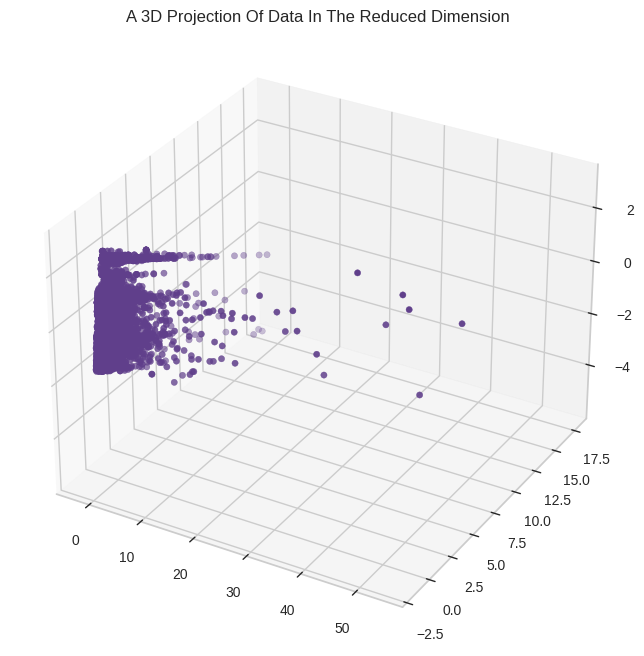

In [65]:
# A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

# Visualisasi Data dalam 3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="#603F8B", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# **Clustering**

Elbow Method to determine the number of clusters to be formed:


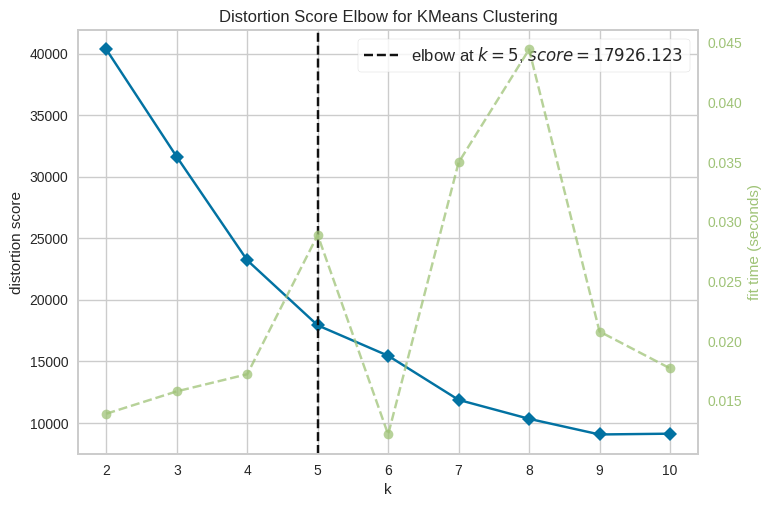

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [66]:
import pandas as pd
from sklearn.cluster import KMeans #this imports the KMeans class
from yellowbrick.cluster import KElbowVisualizer #this imports the KElbowVisualizer class
import matplotlib.pyplot as plt

#Elbow Methods
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [67]:
# Initiating the K-Means Clustering model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit model and predict clusters
yhat_kmeans = kmeans.fit_predict(PCA_ds)

# Adding the Clusters feature to the original dataframe
datasociolla["Clusters"] = yhat_kmeans

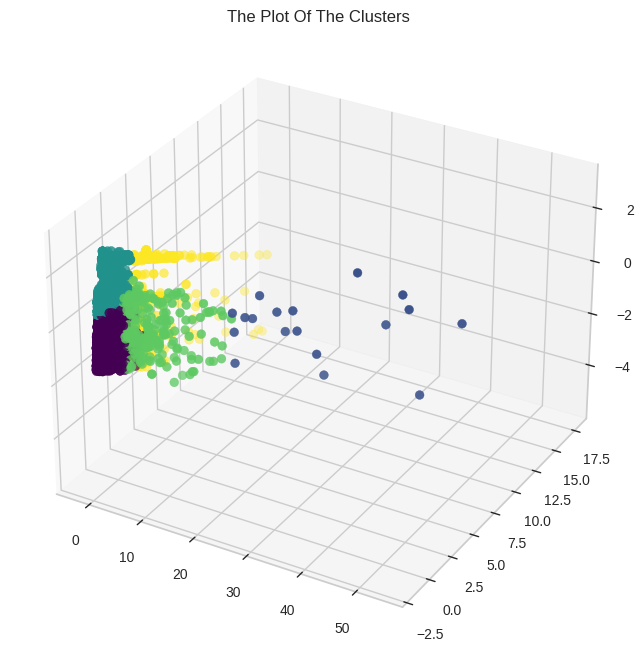

In [68]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # import for 3D plotting
import matplotlib.cm as cm # Import the cm module for colormaps

#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=datasociolla["Clusters"], marker='o', cmap = cm.viridis ) # Use cm.viridis as the colormap
ax.set_title("The Plot Of The Clusters")
plt.show()

# **Profilling Cluster**

<ipython-input-69-3e2f45bce569>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=datasociolla["Clusters"], palette= pal)


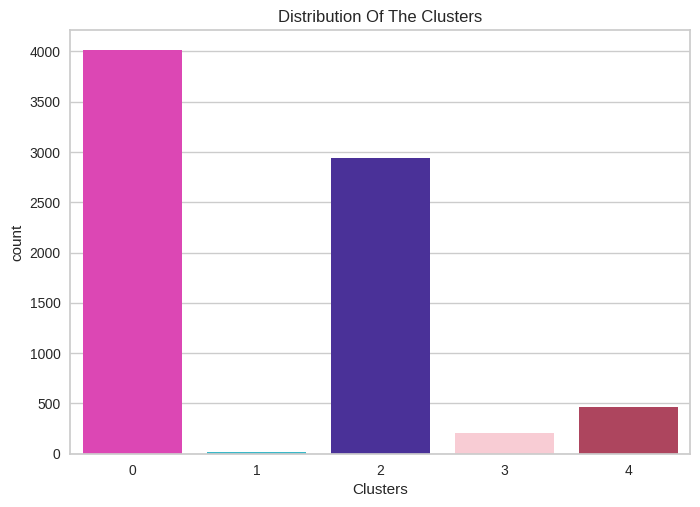

In [69]:
#Distribusi Cluster
pal = ["#F52EC0", "#22CAE0", "#4120A9", "#FFC5D0", "#BE3455"]
pl = sns.countplot(x=datasociolla["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

Urutan cluster dengan jumlah item terbanyak hingga paling sedikit bahkan tidak ada adalah cluster 0,2,4,3,1

Pre processing sebelum profiling lagi

In [70]:
datasociolla2 = data.copy()
datasociolla2['cluster'] = datasociolla['Clusters']
datasociolla2['price'] = datasociolla['price_fix']
datasociolla2.head()

,brand_name,product_name,product_id,beauty_point_earned,price_range,price_by_combinations,url,active_date,default_category,categories,...,average_rating,total_reviews,average_rating_by_types,total_recommended_count,total_repurchase_maybe_count,total_repurchase_no_count,total_repurchase_yes_count,total_in_wishlist,cluster,price
0,796_3ce,MULTI EYE COLOR PALETTE,97802,130,Rp 555.000 - Rp 687.000,NaN,https://www.sociolla.com/eyeshadow/69460-phan-...,2022-10-03T03:30:06.681Z,Eyeshadow,Makeup; Eyes; Eyeshadow,...,4.920000,5,"""star_long_wear"": 5; ""star_packaging"": 4.8; ""s...",5,0,0,5,717,4,621000.0
1,796_3ce,VELVET LIP TINT,97810,50,Rp 264.000,NaN,https://www.sociolla.com/lip-cream/69468-son-k...,2022-10-03T03:02:40.340Z,Lip Cream,Makeup; Lips; Lip Cream,...,4.576190,42,"""star_long_wear"": 4.309523809523809; ""star_pac...",42,10,2,30,682,0,264000.0
2,796_3ce,LIP COLOR,97822,60,Rp 317.000,NaN,https://www.sociolla.com/lip-matte/69480-son-t...,2023-05-30T09:49:15.158Z,Lipstick,Makeup; Lips; Lipstick,...,0.000000,0,NaN,0,0,0,0,173,2,317000.0
3,796_3ce,MINI MULTI EYE COLOR PALETTE,97833,80,Rp 423.000,NaN,https://www.sociolla.com/eyeshadow/69491-phan-...,2022-10-03T03:27:01.334Z,Eyeshadow,Makeup; Eyes; Eyeshadow,...,4.883333,6,"""star_long_wear"": 4.916666666666667; ""star_pac...",12,1,0,11,257,0,423000.0
4,796_3ce,FACE BLUSH,97801,60,Rp 300.000,NaN,https://www.sociolla.com/blush/69459-phan-ma-h...,2022-10-03T03:22:26.610Z,Blush,Makeup; Face; Blush,...,4.858824,13,"""star_long_wear"": 4.9411764705882355; ""star_pa...",17,2,0,15,387,0,300000.0


In [71]:
#Split Kolom Categories
datasociolla2[['category_1', 'category_2', 'category_3']] = data['categories'].str.split(';', expand=True)
datasociolla2.head()

,brand_name,product_name,product_id,beauty_point_earned,price_range,price_by_combinations,url,active_date,default_category,categories,...,total_recommended_count,total_repurchase_maybe_count,total_repurchase_no_count,total_repurchase_yes_count,total_in_wishlist,cluster,price,category_1,category_2,category_3
0,796_3ce,MULTI EYE COLOR PALETTE,97802,130,Rp 555.000 - Rp 687.000,NaN,https://www.sociolla.com/eyeshadow/69460-phan-...,2022-10-03T03:30:06.681Z,Eyeshadow,Makeup; Eyes; Eyeshadow,...,5,0,0,5,717,4,621000.0,Makeup,Eyes,Eyeshadow
1,796_3ce,VELVET LIP TINT,97810,50,Rp 264.000,NaN,https://www.sociolla.com/lip-cream/69468-son-k...,2022-10-03T03:02:40.340Z,Lip Cream,Makeup; Lips; Lip Cream,...,42,10,2,30,682,0,264000.0,Makeup,Lips,Lip Cream
2,796_3ce,LIP COLOR,97822,60,Rp 317.000,NaN,https://www.sociolla.com/lip-matte/69480-son-t...,2023-05-30T09:49:15.158Z,Lipstick,Makeup; Lips; Lipstick,...,0,0,0,0,173,2,317000.0,Makeup,Lips,Lipstick
3,796_3ce,MINI MULTI EYE COLOR PALETTE,97833,80,Rp 423.000,NaN,https://www.sociolla.com/eyeshadow/69491-phan-...,2022-10-03T03:27:01.334Z,Eyeshadow,Makeup; Eyes; Eyeshadow,...,12,1,0,11,257,0,423000.0,Makeup,Eyes,Eyeshadow
4,796_3ce,FACE BLUSH,97801,60,Rp 300.000,NaN,https://www.sociolla.com/blush/69459-phan-ma-h...,2022-10-03T03:22:26.610Z,Blush,Makeup; Face; Blush,...,17,2,0,15,387,0,300000.0,Makeup,Face,Blush


Buat df baru berdasarkan setiap cluster untuk analisis per cluster

In [72]:
cluster_0 = datasociolla2[datasociolla2['cluster'] == 0]
cluster_1 = datasociolla2[datasociolla2['cluster'] == 1]
cluster_2 = datasociolla2[datasociolla2['cluster'] == 2]
cluster_3 = datasociolla2[datasociolla2['cluster'] == 3]
cluster_4 = datasociolla2[datasociolla2['cluster'] == 4]

# **Mengetahui banyak brand untuk setiap cluster**

**Cluster 0**

<ipython-input-73-87791c119ee8>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=filtered_df["brand_name"], palette=pal)
<ipython-input-73-87791c119ee8>:9: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  pl = sns.countplot(x=filtered_df["brand_name"], palette=pal)
<ipython-input-73-87791c119ee8>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  pl.set_xticklabels(pl.get_xticklabels(), rotation=90, ha='center')


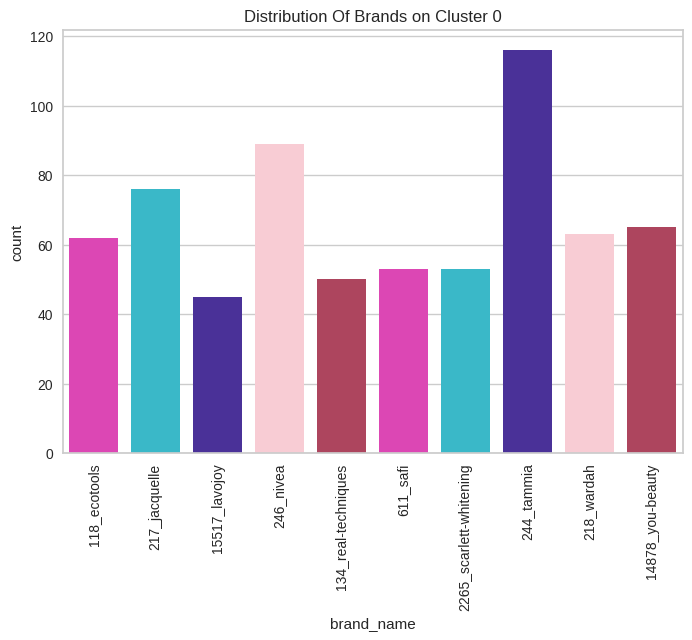

In [73]:
#Cluster 0
pal = ["#F52EC0", "#22CAE0", "#4120A9", "#FFC5D0", "#BE3455"]
top_brands = cluster_0["brand_name"].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 brands
filtered_df = cluster_0[cluster_0["brand_name"].isin(top_brands)]

# Create a countplot for the top 10 brands
pl = sns.countplot(x=filtered_df["brand_name"], palette=pal)
pl.set_title("Distribution Of Brands on Cluster 0")
pl.set_xticklabels(pl.get_xticklabels(), rotation=90, ha='center')
plt.show()

3 brand terbanyak di cluster 0 = Nivea,
Tammia, dan Jacquelle

**Cluster 1**

<ipython-input-74-a1830ede5968>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=filtered_df["brand_name"], palette=pal)
<ipython-input-74-a1830ede5968>:8: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  pl = sns.countplot(x=filtered_df["brand_name"], palette=pal)
<ipython-input-74-a1830ede5968>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  pl.set_xticklabels(pl.get_xticklabels(), rotation=90, ha='center')


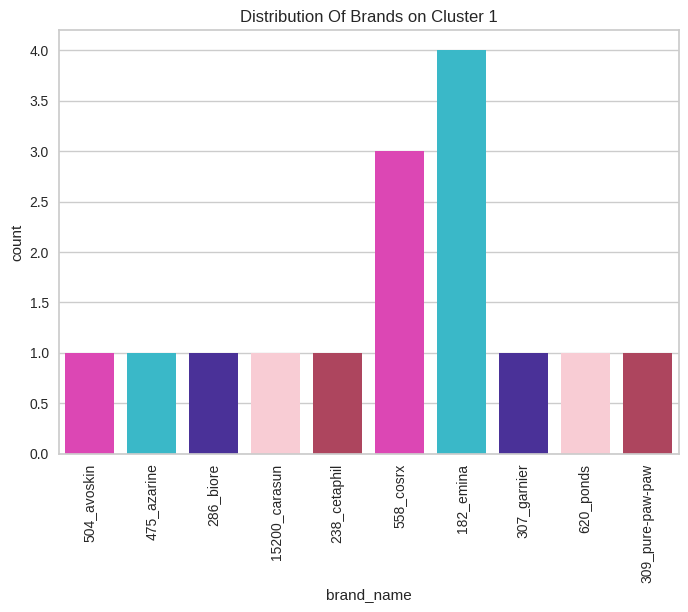

In [74]:
pal = ["#F52EC0", "#22CAE0", "#4120A9", "#FFC5D0", "#BE3455"]
top_brands = cluster_1["brand_name"].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 brands
filtered_df = cluster_1[cluster_1["brand_name"].isin(top_brands)]

# Create a countplot for the top 10 brands
pl = sns.countplot(x=filtered_df["brand_name"], palette=pal)
pl.set_title("Distribution Of Brands on Cluster 1")
pl.set_xticklabels(pl.get_xticklabels(), rotation=90, ha='center')
plt.show()

2 brand terbanyak di cluster 1 = Emina dan Cosrx

**Cluster 2**

<ipython-input-75-550a1f79c659>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=filtered_df["brand_name"], palette=pal)
<ipython-input-75-550a1f79c659>:8: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  pl = sns.countplot(x=filtered_df["brand_name"], palette=pal)
<ipython-input-75-550a1f79c659>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  pl.set_xticklabels(pl.get_xticklabels(), rotation=90, ha='center')


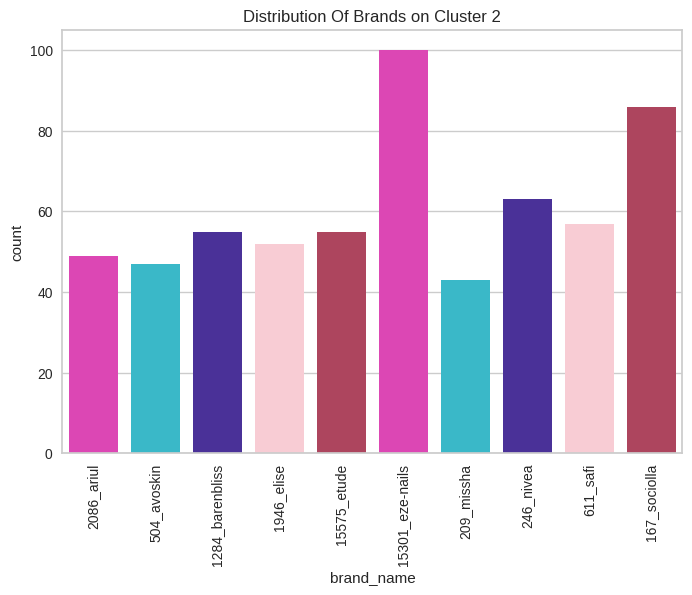

In [75]:
pal = ["#F52EC0", "#22CAE0", "#4120A9", "#FFC5D0", "#BE3455"]
top_brands = cluster_2["brand_name"].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 brands
filtered_df = cluster_2[cluster_2["brand_name"].isin(top_brands)]

# Create a countplot for the top 10 brands
pl = sns.countplot(x=filtered_df["brand_name"], palette=pal)
pl.set_title("Distribution Of Brands on Cluster 2")
pl.set_xticklabels(pl.get_xticklabels(), rotation=90, ha='center')
plt.show()

3 brand terbanyak di cluster 2 = Eze nails, sociolla, dan nivea

**Cluster 3**

<ipython-input-76-11a857df6c6b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=filtered_df["brand_name"], palette=pal)
<ipython-input-76-11a857df6c6b>:8: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  pl = sns.countplot(x=filtered_df["brand_name"], palette=pal)
<ipython-input-76-11a857df6c6b>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  pl.set_xticklabels(pl.get_xticklabels(), rotation=90, ha='center')


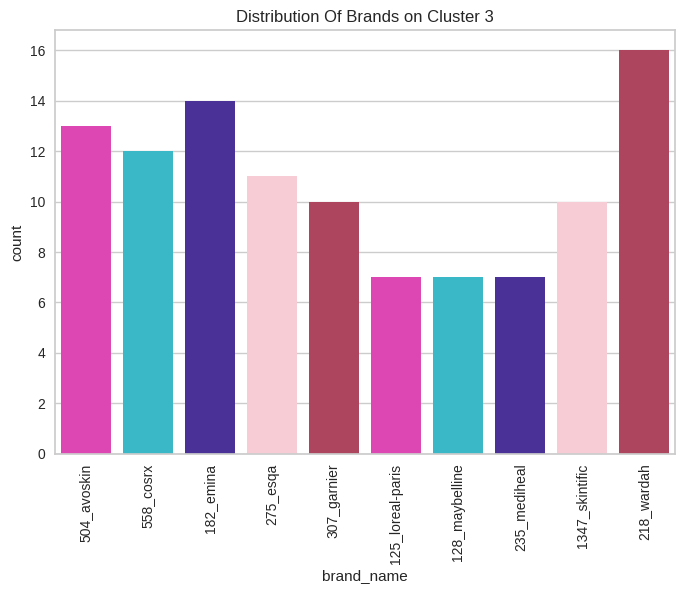

In [76]:
pal = ["#F52EC0", "#22CAE0", "#4120A9", "#FFC5D0", "#BE3455"]
top_brands = cluster_3["brand_name"].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 brands
filtered_df = cluster_3[cluster_3["brand_name"].isin(top_brands)]

# Create a countplot for the top 10 brands
pl = sns.countplot(x=filtered_df["brand_name"], palette=pal)
pl.set_title("Distribution Of Brands on Cluster 3")
pl.set_xticklabels(pl.get_xticklabels(), rotation=90, ha='center')
plt.show()

3 brand terbanyak di cluster 3 = wardah, emina, dan avoskin

**Cluster 4**

<ipython-input-77-e7200bbae616>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=filtered_df["brand_name"], palette=pal)
<ipython-input-77-e7200bbae616>:8: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  pl = sns.countplot(x=filtered_df["brand_name"], palette=pal)
<ipython-input-77-e7200bbae616>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  pl.set_xticklabels(pl.get_xticklabels(), rotation=90, ha='center')


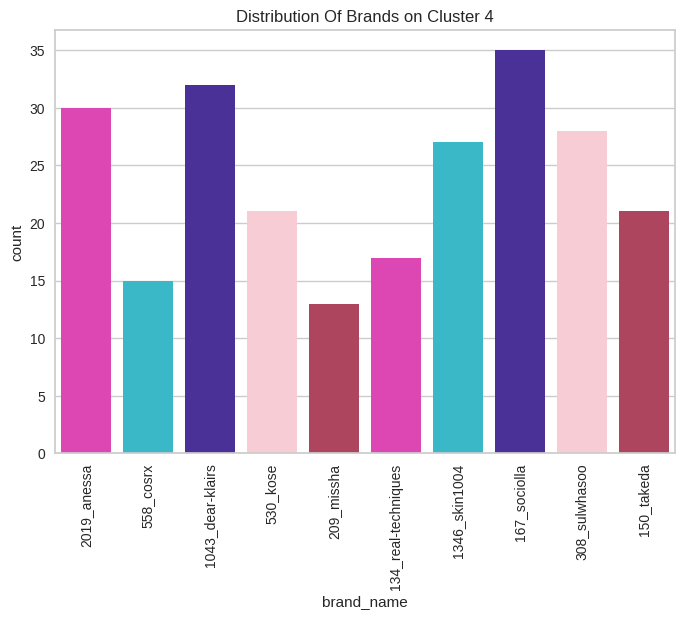

In [77]:
pal = ["#F52EC0", "#22CAE0", "#4120A9", "#FFC5D0", "#BE3455"]
top_brands = cluster_4["brand_name"].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 brands
filtered_df = cluster_4[cluster_4["brand_name"].isin(top_brands)]

# Create a countplot for the top 10 brands
pl = sns.countplot(x=filtered_df["brand_name"], palette=pal)
pl.set_title("Distribution Of Brands on Cluster 4")
pl.set_xticklabels(pl.get_xticklabels(), rotation=90, ha='center')
plt.show()

3 brand terbanyak di cluster 4 adalah sociolla, dear klairs, dan annessa

# **Mengetahui harga pada setiap cluster**

<ipython-input-78-72ed98bc2fce>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(x='cluster', y='price', data=datasociolla2, palette=pal)


<Figure size 1200x1000 with 0 Axes>

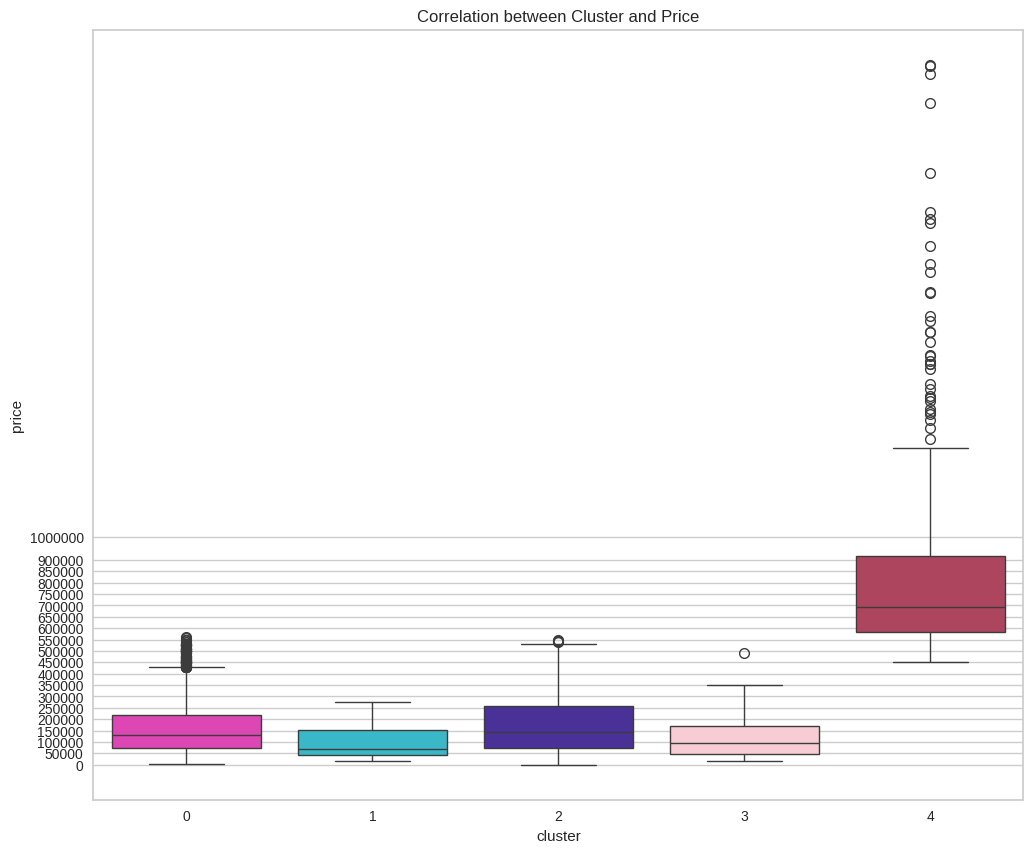

In [78]:
plt.figure(figsize=(12, 10))
plt.figure(figsize=(12, 10))
box_plot = sns.boxplot(x='cluster', y='price', data=datasociolla2, palette=pal)

y_ticks = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000, 650000, 700000, 750000, 800000, 850000, 900000, 1000000]  # Adjust the ticks based on your actual data
plt.yticks(y_ticks, [f'{val:.0f}' for val in y_ticks])
box_plot.set_title("Correlation between Cluster and Price")
plt.show()

Cluster 4 merupakan cluster dengan mayoritas produk harga tertingi

# **Hubungan Total in Wishlist dengan Beauty Point**

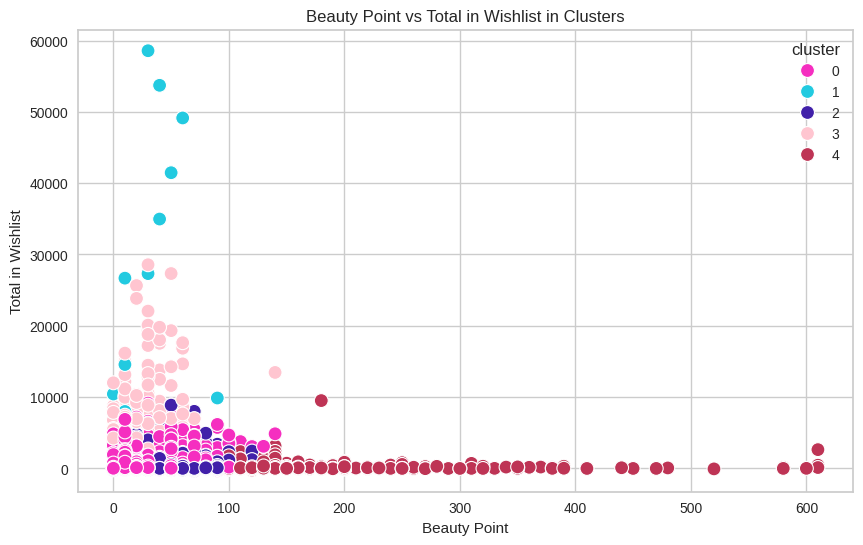

In [79]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='beauty_point_earned', y='total_in_wishlist', hue='cluster', data=datasociolla2, palette=pal, s=100)
plt.xlabel('Beauty Point')
plt.ylabel('Total in Wishlist')
plt.title('Beauty Point vs Total in Wishlist in Clusters')
plt.show()

# **Hubungan antara Cluster dengan Variabel Lain**

**Cluster dan Total Recommended Count**

<ipython-input-80-25079e7eb930>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(x='cluster', y='total_recommended_count', data=datasociolla2, palette=pal)


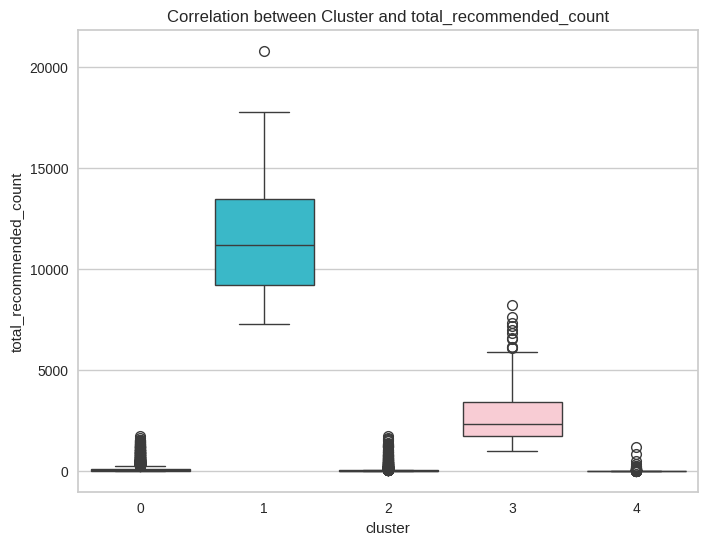

In [80]:
plt.figure(figsize=(8, 6))
box_plot = sns.boxplot(x='cluster', y='total_recommended_count', data=datasociolla2, palette=pal)
box_plot.set_title("Correlation between Cluster and total_recommended_count")
plt.show()

**Cluster dan Total Repurchase 'Maybe' Count**

<ipython-input-81-429442f499ba>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(x='cluster', y='total_repurchase_maybe_count', data=datasociolla2, palette=pal)


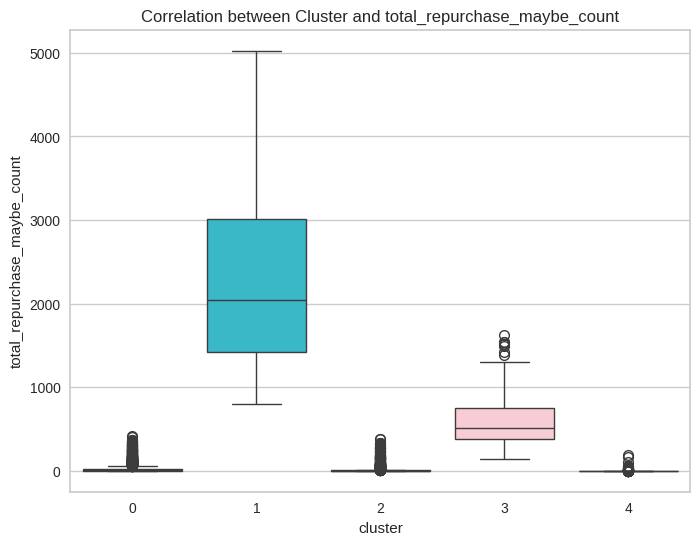

In [81]:
plt.figure(figsize=(8, 6))
box_plot = sns.boxplot(x='cluster', y='total_repurchase_maybe_count', data=datasociolla2, palette=pal)
box_plot.set_title("Correlation between Cluster and total_repurchase_maybe_count")
plt.show()

Cluster dan Total Repurchase 'No' Count

<ipython-input-82-4ee9b451dbf7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(x='cluster', y='total_repurchase_no_count', data=datasociolla2, palette=pal)


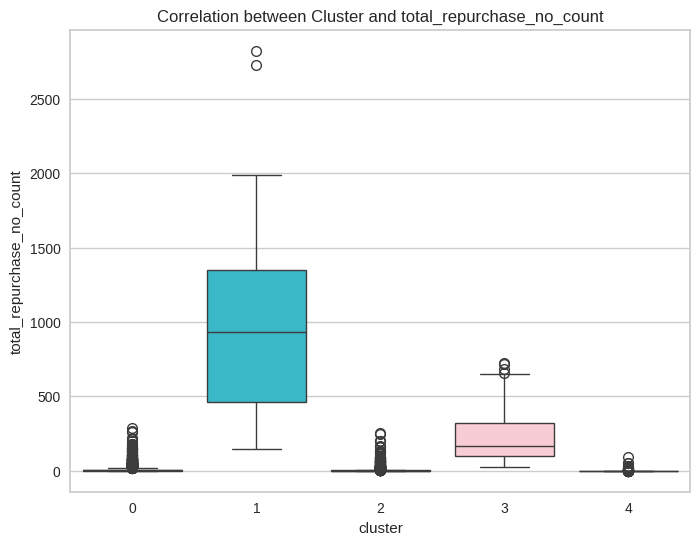

In [82]:
plt.figure(figsize=(8, 6))
box_plot = sns.boxplot(x='cluster', y='total_repurchase_no_count', data=datasociolla2, palette=pal)
box_plot.set_title("Correlation between Cluster and total_repurchase_no_count")
plt.show()

**Cluster dan Total Repurchase 'Yes" Count**

<ipython-input-83-6a7537a38b18>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(x='cluster', y='total_repurchase_yes_count', data=datasociolla2, palette=pal)


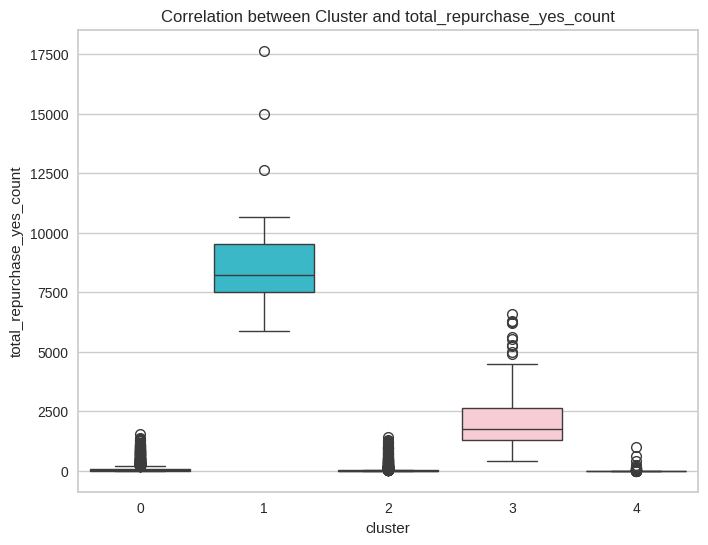

In [83]:
plt.figure(figsize=(8, 6))
box_plot = sns.boxplot(x='cluster', y='total_repurchase_yes_count', data=datasociolla2, palette=pal)
box_plot.set_title("Correlation between Cluster and total_repurchase_yes_count")
plt.show()

**Cluster dan Beauty Point**

<ipython-input-84-d62abe889fec>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(x='cluster', y='beauty_point_earned', data=datasociolla2, palette=pal)


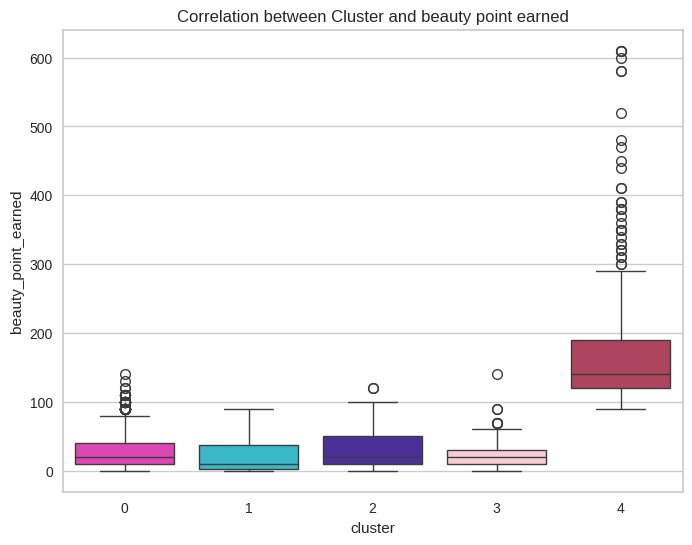

In [84]:
plt.figure(figsize=(8, 6))
box_plot = sns.boxplot(x='cluster', y='beauty_point_earned', data=datasociolla2, palette=pal)
box_plot.set_title("Correlation between Cluster and beauty point earned")
plt.show()

Cluster 4 menjadi cluster tertinggi berdasarkan beauty point

**Cluster dan Total in Wishlist**

<ipython-input-85-e1d5fd270ba8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(x='cluster', y='total_in_wishlist', data=datasociolla2, palette=pal)


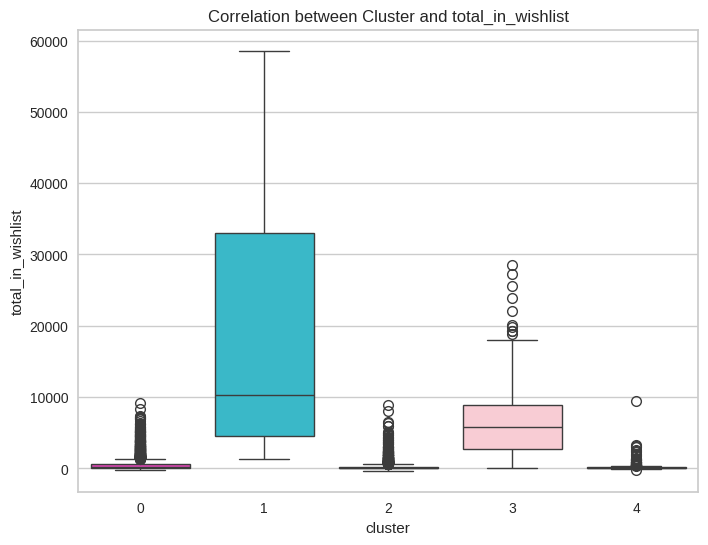

In [85]:
plt.figure(figsize=(8, 6))
box_plot = sns.boxplot(x='cluster', y='total_in_wishlist', data=datasociolla2, palette=pal)
box_plot.set_title("Correlation between Cluster and total_in_wishlist")
plt.show()

# **Mengetahui Category yang sering muncul pada setiap cluster**

**Cluster 0**

<ipython-input-86-95ddb4906680>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=filtered_df["default_category"], palette=pal)
<ipython-input-86-95ddb4906680>:8: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  pl = sns.countplot(x=filtered_df["default_category"], palette=pal)
<ipython-input-86-95ddb4906680>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  pl.set_xticklabels(pl.get_xticklabels(), rotation=90, ha='center')


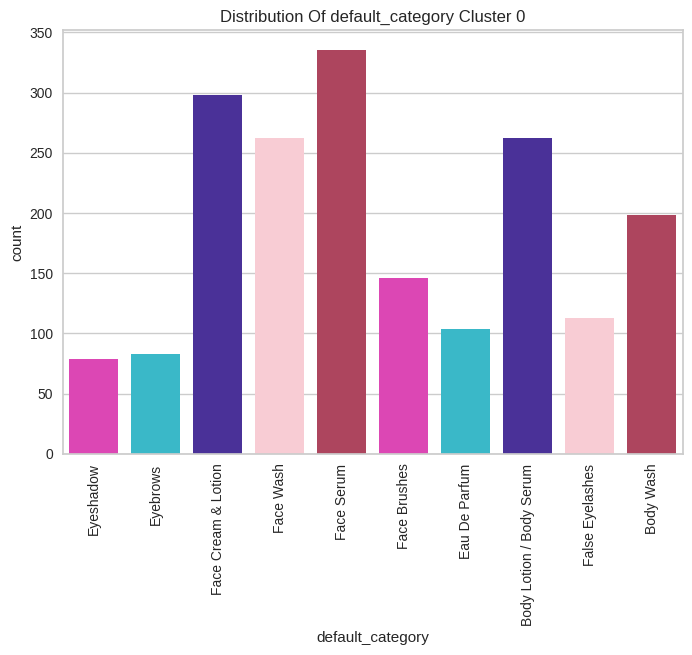

In [86]:
pal = ["#F52EC0", "#22CAE0", "#4120A9", "#FFC5D0", "#BE3455"]
top_brands = cluster_0["default_category"].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 brands
filtered_df = cluster_0[cluster_0["default_category"].isin(top_brands)]

# Create a countplot for the top 10 brands
pl = sns.countplot(x=filtered_df["default_category"], palette=pal)
pl.set_title("Distribution Of default_category Cluster 0")
pl.set_xticklabels(pl.get_xticklabels(), rotation=90, ha='center')
plt.show()

3 category terbanyak = face serum, sheet mask, dan face cream & lotion

<ipython-input-87-1e20f42bc435>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=filtered_df["category_1"], palette=pal)
<ipython-input-87-1e20f42bc435>:8: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  pl = sns.countplot(x=filtered_df["category_1"], palette=pal)
<ipython-input-87-1e20f42bc435>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  pl.set_xticklabels(pl.get_xticklabels(), rotation=90, ha='center')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 417 (\N{LATIN SMALL LETTER O WITH HORN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabt

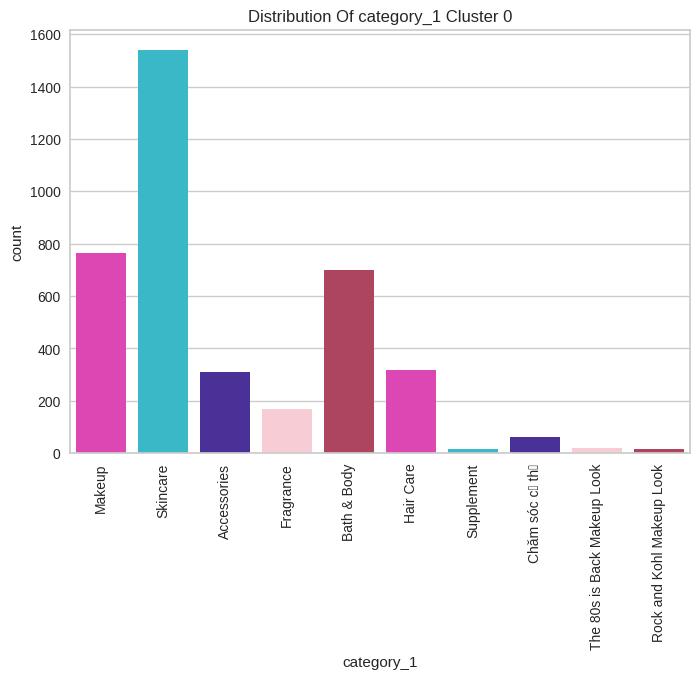

In [87]:
pal = ["#F52EC0", "#22CAE0", "#4120A9", "#FFC5D0", "#BE3455"]
top_brands = cluster_0["category_1"].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 brands
filtered_df = cluster_0[cluster_0["category_1"].isin(top_brands)]

# Create a countplot for the top 10 brands
pl = sns.countplot(x=filtered_df["category_1"], palette=pal)
pl.set_title("Distribution Of category_1 Cluster 0")
pl.set_xticklabels(pl.get_xticklabels(), rotation=90, ha='center')
plt.show()

Category terbanyak ialah skincare pada cluster 0

**Cluster 1**

<ipython-input-88-0bd1d4d95d5e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=filtered_df["default_category"], palette=pal)
<ipython-input-88-0bd1d4d95d5e>:8: UserWarning: 
The palette list has fewer values (5) than needed (9) and will cycle, which may produce an uninterpretable plot.
  pl = sns.countplot(x=filtered_df["default_category"], palette=pal)
<ipython-input-88-0bd1d4d95d5e>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  pl.set_xticklabels(pl.get_xticklabels(), rotation=90, ha='center')


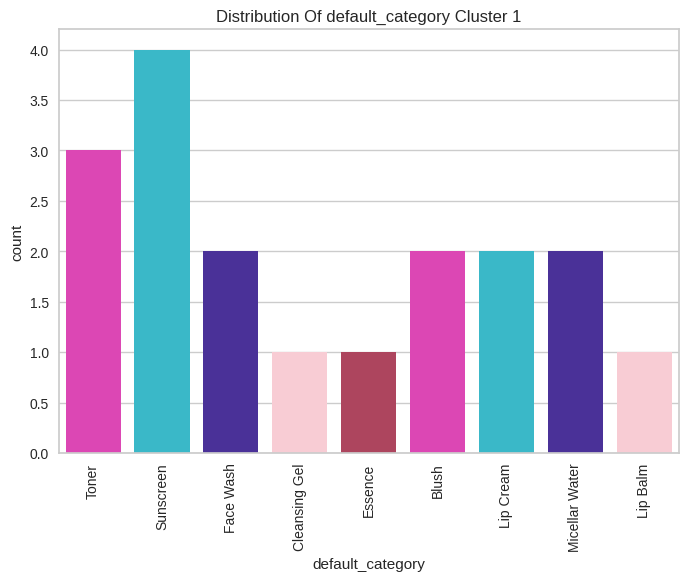

In [88]:
pal = ["#F52EC0", "#22CAE0", "#4120A9", "#FFC5D0", "#BE3455"]
top_brands = cluster_1["default_category"].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 brands
filtered_df = cluster_1[cluster_1["default_category"].isin(top_brands)]

# Create a countplot for the top 10 brands
pl = sns.countplot(x=filtered_df["default_category"], palette=pal)
pl.set_title("Distribution Of default_category Cluster 1")
pl.set_xticklabels(pl.get_xticklabels(), rotation=90, ha='center')
plt.show()

Default category yang sering muncul ialah sunscreen dan toner

<ipython-input-89-0c43629cefaf>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=filtered_df["category_1"], palette=pal)
<ipython-input-89-0c43629cefaf>:8: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  pl = sns.countplot(x=filtered_df["category_1"], palette=pal)
<ipython-input-89-0c43629cefaf>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  pl.set_xticklabels(pl.get_xticklabels(), rotation=90, ha='center')


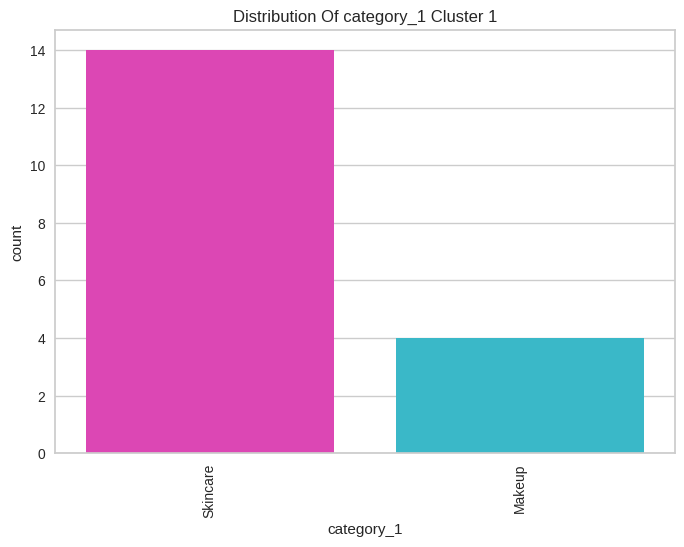

In [89]:
pal = ["#F52EC0", "#22CAE0", "#4120A9", "#FFC5D0", "#BE3455"]
top_brands = cluster_1["category_1"].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 brands
filtered_df = cluster_1[cluster_1["category_1"].isin(top_brands)]

# Create a countplot for the top 10 brands
pl = sns.countplot(x=filtered_df["category_1"], palette=pal)
pl.set_title("Distribution Of category_1 Cluster 1")
pl.set_xticklabels(pl.get_xticklabels(), rotation=90, ha='center')
plt.show()

2 category dengan urutan terbanyak pada cluster 1 adalah skincare dan makeup

**Cluster 2**

<ipython-input-90-7cf7f718ff47>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=filtered_df["default_category"], palette=pal)
<ipython-input-90-7cf7f718ff47>:8: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  pl = sns.countplot(x=filtered_df["default_category"], palette=pal)
<ipython-input-90-7cf7f718ff47>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  pl.set_xticklabels(pl.get_xticklabels(), rotation=90, ha='center')


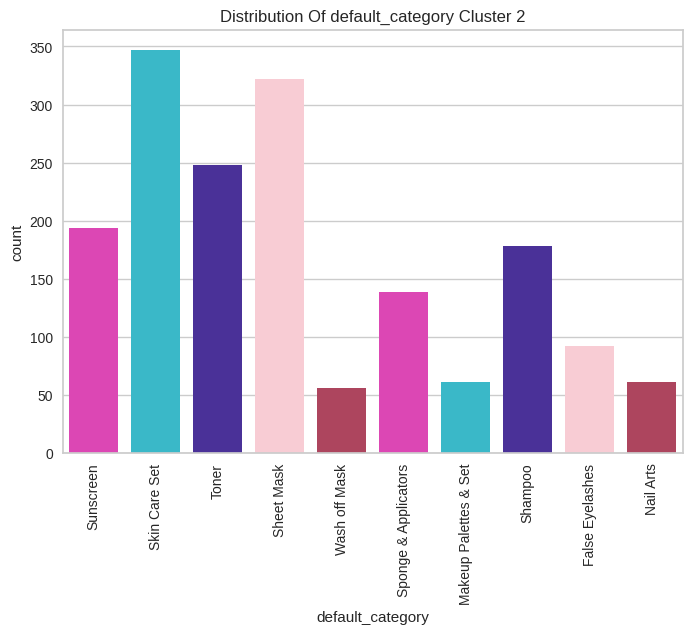

In [90]:
pal = ["#F52EC0", "#22CAE0", "#4120A9", "#FFC5D0", "#BE3455"]
top_brands = cluster_2["default_category"].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 brands
filtered_df = cluster_2[cluster_2["default_category"].isin(top_brands)]

# Create a countplot for the top 10 brands
pl = sns.countplot(x=filtered_df["default_category"], palette=pal)
pl.set_title("Distribution Of default_category Cluster 2")
pl.set_xticklabels(pl.get_xticklabels(), rotation=90, ha='center')
plt.show()

2 default category yang paling banyak pada cluster 2 ialah skincare set dan face cream&lotion

<ipython-input-91-2c45fa9e95f3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=filtered_df["category_1"], palette=pal)
<ipython-input-91-2c45fa9e95f3>:8: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  pl = sns.countplot(x=filtered_df["category_1"], palette=pal)
<ipython-input-91-2c45fa9e95f3>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  pl.set_xticklabels(pl.get_xticklabels(), rotation=90, ha='center')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 417 (\N{LATIN SMALL LETTER O WITH HORN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabt

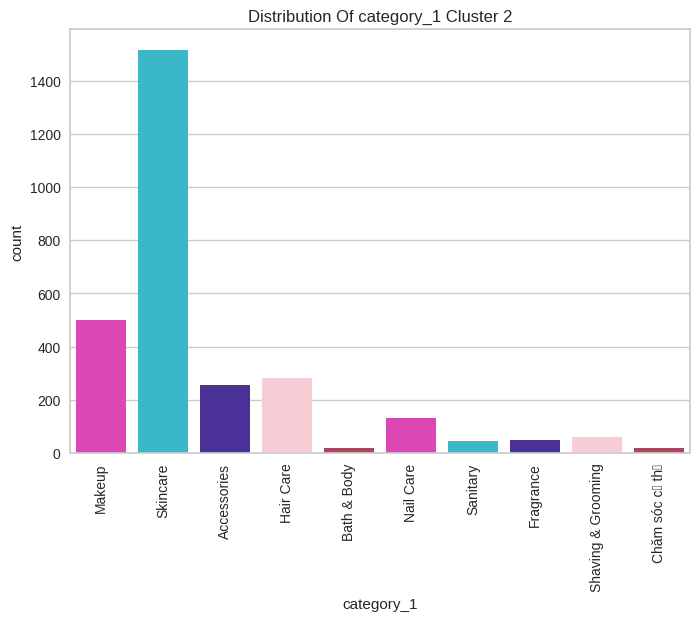

In [91]:
pal = ["#F52EC0", "#22CAE0", "#4120A9", "#FFC5D0", "#BE3455"]
top_brands = cluster_2["category_1"].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 brands
filtered_df = cluster_2[cluster_2["category_1"].isin(top_brands)]

# Create a countplot for the top 10 brands
pl = sns.countplot(x=filtered_df["category_1"], palette=pal)
pl.set_title("Distribution Of category_1 Cluster 2")
pl.set_xticklabels(pl.get_xticklabels(), rotation=90, ha='center')
plt.show()

2 category yang paling banyak pada cluster 2 ialah makeup dan skincare

**Cluster 3**

<ipython-input-92-2d2763d4f43a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=filtered_df["default_category"], palette=pal)
<ipython-input-92-2d2763d4f43a>:8: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  pl = sns.countplot(x=filtered_df["default_category"], palette=pal)
<ipython-input-92-2d2763d4f43a>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  pl.set_xticklabels(pl.get_xticklabels(), rotation=90, ha='center')


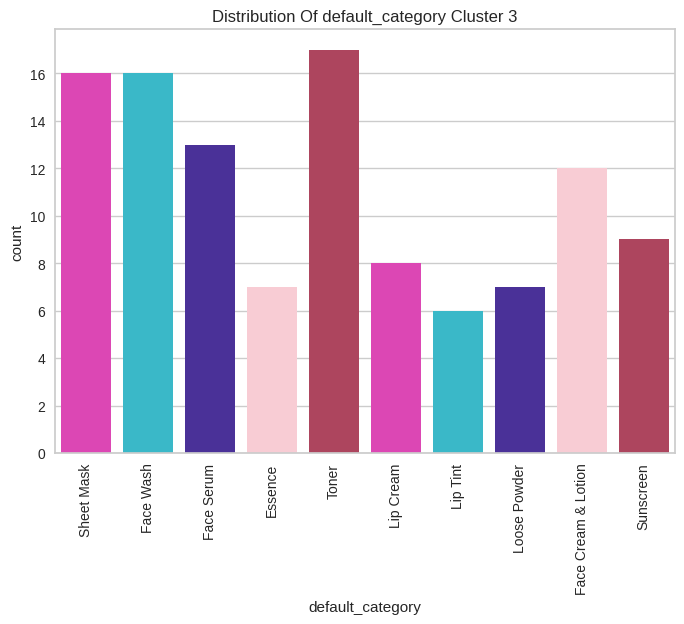

In [92]:
pal = ["#F52EC0", "#22CAE0", "#4120A9", "#FFC5D0", "#BE3455"]
top_brands = cluster_3["default_category"].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 brands
filtered_df = cluster_3[cluster_3["default_category"].isin(top_brands)]

# Create a countplot for the top 10 brands
pl = sns.countplot(x=filtered_df["default_category"], palette=pal)
pl.set_title("Distribution Of default_category Cluster 3")
pl.set_xticklabels(pl.get_xticklabels(), rotation=90, ha='center')
plt.show()

default category paling banyak pada cluster 3 ialah toner

<ipython-input-93-31d7fa9c5788>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=filtered_df["category_1"], palette=pal)
<ipython-input-93-31d7fa9c5788>:8: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  pl = sns.countplot(x=filtered_df["category_1"], palette=pal)
<ipython-input-93-31d7fa9c5788>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  pl.set_xticklabels(pl.get_xticklabels(), rotation=90, ha='center')


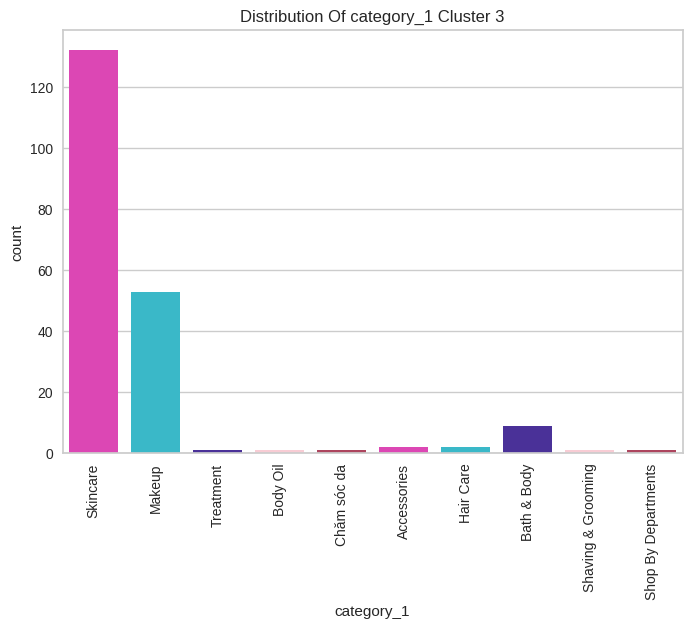

In [93]:
pal = ["#F52EC0", "#22CAE0", "#4120A9", "#FFC5D0", "#BE3455"]
top_brands = cluster_3["category_1"].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 brands
filtered_df = cluster_3[cluster_3["category_1"].isin(top_brands)]

# Create a countplot for the top 10 brands
pl = sns.countplot(x=filtered_df["category_1"], palette=pal)
pl.set_title("Distribution Of category_1 Cluster 3")
pl.set_xticklabels(pl.get_xticklabels(), rotation=90, ha='center')
plt.show()

Skincare merupakan category paling banyak pada cluster 3

**Cluster 4**

<ipython-input-100-23c3155bc277>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=filtered_df["default_category"], palette=pal)
<ipython-input-100-23c3155bc277>:8: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  pl = sns.countplot(x=filtered_df["default_category"], palette=pal)
<ipython-input-100-23c3155bc277>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  pl.set_xticklabels(pl.get_xticklabels(), rotation=90, ha='center')


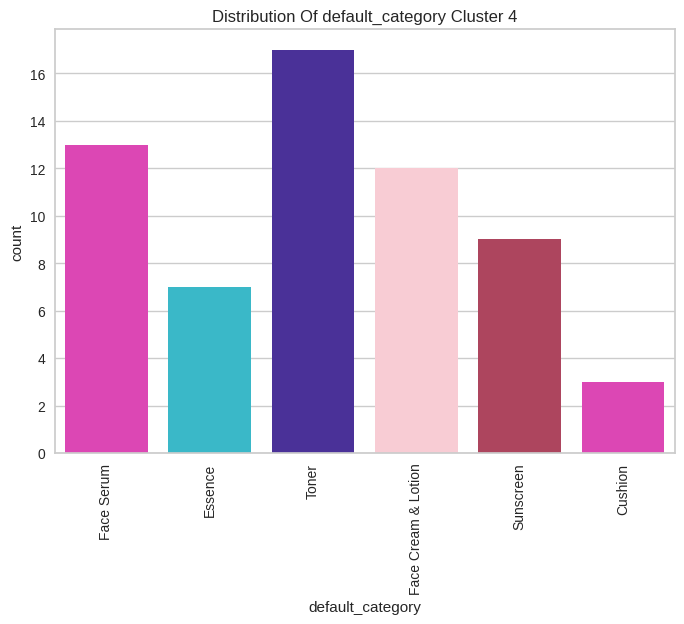

In [100]:
pal = ["#F52EC0", "#22CAE0", "#4120A9", "#FFC5D0", "#BE3455"]
top_brands = cluster_4["default_category"].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 brands
filtered_df = cluster_3[cluster_3["default_category"].isin(top_brands)]

# Create a countplot for the top 10 brands
pl = sns.countplot(x=filtered_df["default_category"], palette=pal)
pl.set_title("Distribution Of default_category Cluster 4")
pl.set_xticklabels(pl.get_xticklabels(), rotation=90, ha='center')
plt.show()

<ipython-input-101-d3a7af1fd88f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=filtered_df["category_1"], palette=pal)
<ipython-input-101-d3a7af1fd88f>:8: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  pl = sns.countplot(x=filtered_df["category_1"], palette=pal)
<ipython-input-101-d3a7af1fd88f>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  pl.set_xticklabels(pl.get_xticklabels(), rotation=90, ha='center')


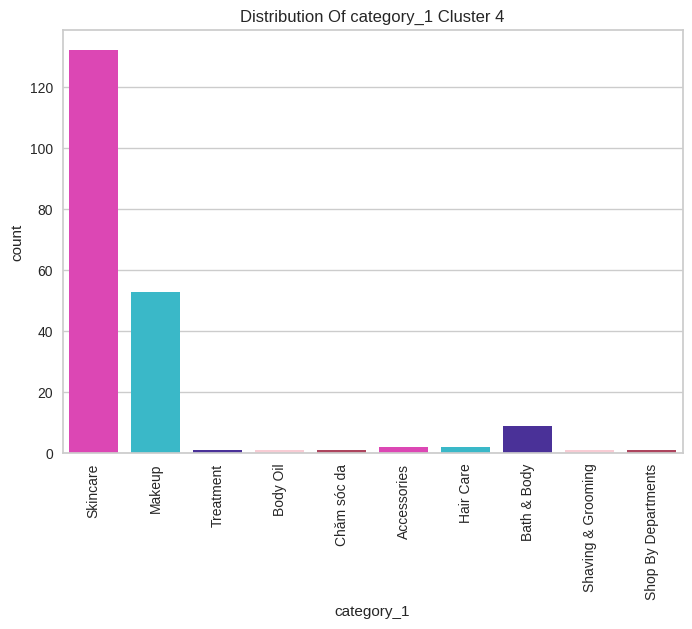

In [101]:
pal = ["#F52EC0", "#22CAE0", "#4120A9", "#FFC5D0", "#BE3455"]
top_brands = cluster_3["category_1"].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 brands
filtered_df = cluster_3[cluster_3["category_1"].isin(top_brands)]

# Create a countplot for the top 10 brands
pl = sns.countplot(x=filtered_df["category_1"], palette=pal)
pl.set_title("Distribution Of category_1 Cluster 4")
pl.set_xticklabels(pl.get_xticklabels(), rotation=90, ha='center')
plt.show()

# **Brand Specific Market Analysis**

**Berdasarkan Beauty Point**

In [96]:
df_product_rearranged = datasociolla2.sort_values(by='beauty_point_earned', ascending=False).reset_index(drop=True)

# Output the 10 maximum values in the 'beauty_point' column
df_product_rearranged.head(10)

,brand_name,product_name,product_id,beauty_point_earned,price_range,price_by_combinations,url,active_date,default_category,categories,...,total_recommended_count,total_repurchase_maybe_count,total_repurchase_no_count,total_repurchase_yes_count,total_in_wishlist,cluster,price,category_1,category_2,category_3
0,92_sk-ii,Genoptics Aura Essence 30ml,1818,610,Rp 3.070.696,NaN,https://www.sociolla.com/essence/7621-genoptic...,NaN,Essence,Skincare; Treatment; Essence,...,59,13,7,46,456,4,3070696.0,Skincare,Treatment,Essence
1,92_sk-ii,Facial Treatment Essence,2066,610,Rp 1.280.000 - Rp 3.050.000,"""75 ml"": 1280000",https://www.sociolla.com/essence/7978-facial-t...,2022-08-15T09:18:04.752Z,Essence,Skincare; Treatment; Essence,...,844,188,91,631,2640,4,2165000.0,Skincare,Treatment,Essence
2,1346_skin1004,Centella Basic 5 (Cream),95195,610,Rp 3.077.000,NaN,https://www.sociolla.com/skin-care-set/66853-c...,2023-05-30T03:45:16.860Z,Skin Care Set,Skincare; Skin Care Set; Skin Care Set,...,0,0,0,0,130,4,3077000.0,Skincare,Skin Care Set,Skin Care Set
3,308_sulwhasoo,NEW Concentrated Ginseng Renewing Cream Classic,102206,600,Rp 3.037.000,"""30 ml"": 3037000",https://www.sociolla.com/moisturizer/73864-new...,2023-02-13T04:22:04.207Z,Face Cream & Lotion,Skincare; Moisturizer; Face Cream & Lotion,...,1,0,0,1,16,4,3037000.0,Skincare,Moisturizer,Face Cream & Lotion
4,1346_skin1004,Centella Basic 5 (Soothing Cream),95194,580,Rp 2.907.000,NaN,https://www.sociolla.com/skin-care-set/66852-c...,2023-05-30T03:41:47.079Z,Skin Care Set,Skincare; Skin Care Set,...,0,0,0,0,134,4,2907000.0,Skincare,Skin Care Set,None
5,308_sulwhasoo,Concentrated Ginseng Brightening Serum,106182,580,Rp 1.900.000 - Rp 2.900.000,NaN,https://www.sociolla.com/face-serum/77840-conc...,2023-08-29T03:56:53.824Z,Face Serum,Skincare; Treatment; Face Serum,...,0,0,0,0,5,4,2400000.0,Skincare,Treatment,Face Serum
6,1346_skin1004,Centella Basic 4 (Cream),95182,520,Rp 2.601.000,NaN,https://www.sociolla.com/default-category/6684...,2023-05-30T03:17:53.638Z,Skin Care Set,Skincare; Skin Care Set; Skin Care Set,...,0,0,0,0,-62,4,2601000.0,Skincare,Skin Care Set,Skin Care Set
7,1346_skin1004,Centella Basic 4 (Soothing Cream),95199,480,Rp 2.431.000,NaN,https://www.sociolla.com/skin-care-set/66857-c...,2023-05-30T03:15:01.132Z,Skin Care Set,Skincare; Skin Care Set,...,0,0,0,0,71,4,2431000.0,Skincare,Skin Care Set,None
8,308_sulwhasoo,NEW Concentrated Ginseng Renewing Cream EX,102207,470,Rp 2.380.000,"""30ml"": 2380000",https://www.sociolla.com/face-cream-lotion/738...,2023-02-13T04:22:18.838Z,Face Cream & Lotion,Skincare; Moisturizer; Face Cream & Lotion,...,1,0,0,1,6,4,2380000.0,Skincare,Moisturizer,Face Cream & Lotion
9,308_sulwhasoo,Concentrated Ginseng Renewing Eye Cream,107308,450,Rp 2.280.000,NaN,https://www.sociolla.com/eye-cream/78966-conce...,NaN,Eye Cream,Skincare; Eye Care; Eye Cream,...,0,0,0,0,2,4,2280000.0,Skincare,Eye Care,Eye Cream


In [97]:
a = df_product_rearranged.head(10)['product_name']
a.to_list()

['Genoptics Aura Essence 30ml',
 'Facial Treatment Essence',
 'Centella Basic 5 (Cream)',
 'NEW Concentrated Ginseng Renewing Cream Classic',
 'Centella Basic 5 (Soothing Cream)',
 'Concentrated Ginseng Brightening Serum',
 'Centella Basic 4 (Cream)',
 'Centella Basic 4 (Soothing Cream)',
 'NEW Concentrated Ginseng Renewing Cream EX',
 'Concentrated Ginseng Renewing Eye Cream']

**Berdasarkan Total in Wishlist**

In [98]:
df_product_rearranged2 = datasociolla2.sort_values(by='total_in_wishlist', ascending=False).reset_index(drop=True)

# Output the 10 maximum values in the 'beauty_point' column
df_product_rearranged2.head(10)

,brand_name,product_name,product_id,beauty_point_earned,price_range,price_by_combinations,url,active_date,default_category,categories,...,total_recommended_count,total_repurchase_maybe_count,total_repurchase_no_count,total_repurchase_yes_count,total_in_wishlist,cluster,price,category_1,category_2,category_3
0,558_cosrx,Low pH Good Morning Cleanser,6400,30,Rp 65.000 - Rp 155.000,"""150 ml"": 155000; ""50ml"": 65000",https://www.sociolla.com/cleansing-gel/9205-lo...,2022-05-01T23:41:55.652Z,Cleansing Gel,Skincare; Cleanser; Cleansing Gel,...,17763,2486,1019,14977,58568,1,110000.0,Skincare,Cleanser,Cleansing Gel
1,558_cosrx,AHA/BHA Clarifying Treatment Toner,6386,40,Rp 200.000,"""150 ml"": 200000",https://www.sociolla.com/toner/9207-aha-bha-cl...,2022-08-09T10:58:03.787Z,Toner,Skincare; Treatment; Toner,...,17474,4260,1699,12658,53718,1,200000.0,Skincare,Treatment,Toner
2,598_pyunkang-yul,Essence Toner,21979,60,Rp 80.000 - Rp 310.000,"""100 ml"": 200000; ""30 ml"": 80000; ""200 ml"": 31...",https://www.sociolla.com/toner/12328-essence-t...,2022-06-27T04:05:46.439Z,Toner,Skincare; Treatment; Toner,...,8662,1380,398,7161,49141,1,195000.0,Skincare,Treatment,Toner
3,558_cosrx,Advanced Snail Mucin 96 Power Essence,6384,50,Rp 275.000,"""Non Specify"": 275000",https://www.sociolla.com/essence/11023-advance...,2022-04-30T15:50:59.366Z,Essence,Skincare; Treatment; Essence,...,11733,1998,638,9517,41465,1,275000.0,Skincare,Treatment,Essence
4,504_avoskin,Miraculous Refining Toner,33303,40,Rp 109.900 - Rp 216.500,NaN,https://www.sociolla.com/toner/10422-miraculou...,2022-05-06T02:25:26.782Z,Toner,Skincare; Treatment; Toner,...,7276,1291,444,5881,34969,1,163200.0,Skincare,Treatment,Toner
5,1347_skintific,5X Ceramide Barrier Moisture Gel,92496,30,Rp 154.200,"""30 gr"": 154200",https://www.sociolla.com/face-gel/64154-5x-cer...,2022-05-01T23:28:36.916Z,Face Gel,Skincare; Moisturizer; Face Gel,...,4932,627,251,4237,28562,3,154200.0,Skincare,Moisturizer,Face Gel
6,558_cosrx,Oil Free Ultra Moisturizing Lotion (with Birch...,20786,50,Rp 299.900,"""100 ml"": 299900",https://www.sociolla.com/face-cream-lotion/959...,2022-05-12T02:17:18.496Z,Face Cream & Lotion,Skincare; Moisturizer; Face Cream & Lotion,...,5435,966,375,4346,27328,3,299900.0,Skincare,Moisturizer,Face Cream & Lotion
7,15200_carasun,Carasun Solar Smart UV Protector SPF 45 PA++++...,80032,30,Rp 19.500 - Rp 159.000,"""30 ml"": 70900; ""8 ml"": 19500; ""70ml"": 159000",https://www.sociolla.com/sunscreen/51690-solar...,2022-05-05T00:27:55.247Z,Sunscreen,Skincare; Sun Care; Sunscreen,...,9210,1573,784,7470,27319,1,89250.0,Skincare,Sun Care,Sunscreen
8,475_azarine,Hydrashoothe Sunscreen Gel Spf45+++,82166,10,Rp 65.000,"""50 ml"": 65000",https://www.sociolla.com/sunscreen/53824-hydra...,2022-05-01T23:16:08.149Z,Sunscreen,Skincare; Sunscreen; Sun Care,...,9168,799,215,8372,26682,1,65000.0,Skincare,Sunscreen,Sun Care
9,1985_dear-me-beauty,Skin Barrier Water Cream,84727,20,Rp 129.000,"""New - REFORMULATED Formula"": 129000",https://www.sociolla.com/face-cream-lotion/563...,2022-05-01T23:20:18.162Z,Face Cream & Lotion,Skincare; Moisturizer; Face Cream & Lotion,...,4252,782,234,3406,25643,3,129000.0,Skincare,Moisturizer,Face Cream & Lotion


In [99]:
a = df_product_rearranged2.head(10)['product_name']
a.to_list()

['Low pH Good Morning Cleanser',
 'AHA/BHA Clarifying Treatment Toner',
 'Essence Toner',
 'Advanced Snail Mucin 96 Power Essence',
 'Miraculous Refining Toner',
 '5X Ceramide Barrier Moisture Gel',
 'Oil Free Ultra Moisturizing Lotion (with Birch Sap)',
 'Carasun Solar Smart UV Protector SPF 45 PA++++ Sunscreen',
 'Hydrashoothe Sunscreen Gel Spf45+++',
 'Skin Barrier Water Cream']

# **Hasil Profilling Clusters**

Cluster 0 =

*   Cluster dengan jumlah item terbanyak nomor 1
*   3 brand terbanyak yang mengisi cluster 0 adalah Nivea, Tammia, dan Safi
*   Mayoritas produk dengan harga standar dari Rp55.000-Rp200.000
*   Cluster urutan ke-3 berdasarkan item yang dimasukkan ke wishlist  
*   Kategori paling banyak adalah Face serum, sheet mask, dan face cream&lotion

Cluster 1 =
*   Cluster dengan jumlah item paling sedikit
*   2 brand terbanyak yang mengisi cluster 1 adalah Emina dan Cosrx
*   Mayoritas produk dengan harga paling rendah dari Rp40.000-Rp150.000
*   Cluster dengan item paling banyak yang dimasukkan ke wishlist
*   Kategori paling banyak adalah Sunscreen dan toner

Cluster 2 =
*   Cluster dengan jumlah item terbanyak ke-2
*   2 brand terbanyak yang mengisi cluster 2 adalah Sociolla dan Dear Clairs
*   Mayoritas produk dengan harga paling tinggi dari Rp375.000-Rp625.000
*   Cluster dengan item paling sedikit yang dimasukkan ke wishlist pengguna
*   Kategori paling banyak adalah skincare set dan face cream & lotion

Cluster 3 =
*   Cluster dengan jumlah item terbanyak ke-3
*   3 brand terbanyak yang mengisi cluster 2 adalah Wardah, Emina, dan Avoskin
*   Mayoritas produk dengan harga paling tinggi ke-3 dari Rp50.000-Rp175.000
*   Cluster dengan item paling banyak ke-2 yang dimasukkan ke wishlist pengguna
*   Kategori paling banyak adalah toner






